In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

C:\Users\Asus\Anaconda3\envs\deep-learning-3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.6946 - acc: 0.5499 - val_loss: 0.6900 - val_acc: 0.5845
Epoch 2/100
1022/1022 [==============================] - 0s 65us/step - loss: 0.6873 - acc: 0.6125 - val_loss: 0.6811 - val_acc: 0.6484
Epoch 3/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.6798 - acc: 0.6888 - val_loss: 0.6720 - val_acc: 0.7580
Epoch 4/100
1022/1022 [==============================] - 0s 63us/step - loss: 0.6720 - acc: 0.7466 - val_loss: 0.6631 - val_acc: 0.7991
Epoch 5/100
1022/1022 [==============================] - 0s 65us/step - loss: 0.6645 - acc: 0.7877 - val_loss: 0.6551 - val_acc: 0.8128
Epoch 6/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.6575 - acc: 0.8063 - val_loss: 0.6474 - val_acc: 0.8402
Epoch 7/100
1022/1022 [==============================] - 0s 66us/step - loss: 0.6508 - acc

1022/1022 [==============================] - 0s 66us/step - loss: 0.3253 - acc: 0.8757 - val_loss: 0.3048 - val_acc: 0.8630
Epoch 59/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.3228 - acc: 0.8738 - val_loss: 0.3065 - val_acc: 0.8676
Epoch 60/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.3208 - acc: 0.8738 - val_loss: 0.3022 - val_acc: 0.8676
Epoch 61/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.3188 - acc: 0.8748 - val_loss: 0.3025 - val_acc: 0.8676
Epoch 62/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.3169 - acc: 0.8748 - val_loss: 0.3012 - val_acc: 0.8676
Epoch 63/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.3150 - acc: 0.8777 - val_loss: 0.2974 - val_acc: 0.8676
Epoch 64/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.3134 - acc: 0.8796 - val_loss: 0.2979 - val_acc: 0.8676
Epoch 65/100
1022/1022 [==============================

In [19]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 41us/step


0.8675799113974724

In [20]:
import matplotlib.pyplot as plt

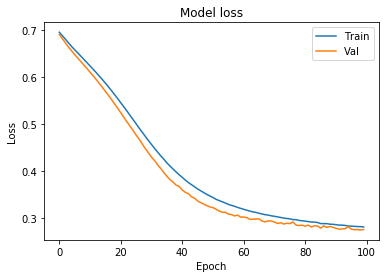

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

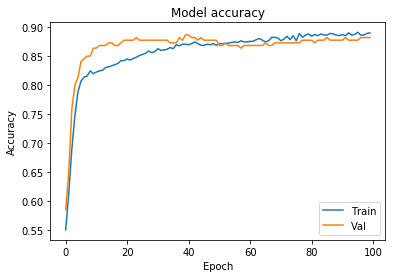

In [22]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4602 - acc: 0.7994 - val_loss: 0.3631 - val_acc: 0.8630
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3247 - acc: 0.8738 - val_loss: 0.3584 - val_acc: 0.8584
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3245 - acc: 0.8699 - val_loss: 0.3042 - val_acc: 0.8584
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2830 - acc: 0.8767 - val_loss: 0.2976 - val_acc: 0.8676
Epoch 5/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.2853 - acc: 0.8806 - val_loss: 0.2668 - val_acc: 0.8904
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2491 - acc: 0.8953 - val_loss: 0.2636 - val_acc: 0.8858
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2470 - acc: 0.8963 - val_loss: 0.2493 - val_acc: 0.8858
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1870 - acc: 0.9227 - val_loss: 0.2904 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1442 - acc: 0.9393 - val_loss: 0.4008 - val_acc: 0.9041
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1438 - acc: 0.9393 - val_loss: 0.3039 - val_acc: 0.8904
Epoch 64/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.1642 - acc: 0.9335 - val_loss: 0.2921 - val_acc: 0.8584
Epoch 65/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.1895 - acc: 0.9119 - val_loss: 0.2710 - val_acc: 0.8813
Epoch 66/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.1751 - acc: 0.9305 - val_loss: 0.2479 - val_acc: 0.9041
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1482 - acc: 0.9384 - val_loss: 0.3306 - val_acc: 0.8813
Epoch 68/100
1022/1022 [========================

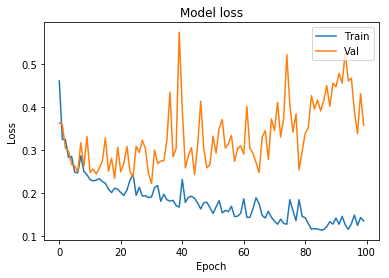

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

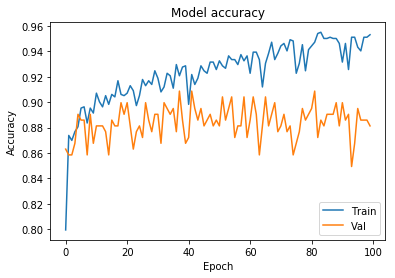

In [25]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 7s 7ms/step - loss: 14.7521 - acc: 0.6223 - val_loss: 4.0558 - val_acc: 0.8721
Epoch 2/100
1022/1022 [==============================] - 4s 3ms/step - loss: 1.7764 - acc: 0.7613 - val_loss: 0.6725 - val_acc: 0.8721
Epoch 3/100
1022/1022 [==============================] - 5s 4ms/step - loss: 0.5688 - acc: 0.8562 - val_loss: 0.4788 - val_acc: 0.8858
Epoch 4/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5030 - acc: 0.8699 - val_loss: 0.4771 - val_acc: 0.8813
Epoch 5/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4821 - acc: 0.8728 - val_loss: 0.4529 - val_acc: 0.8813
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4896 - acc: 0.8669 - val_loss: 0.4463 - val_acc: 0.8858
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5011 - acc: 0.8601 - val_loss: 0.4999 - val_acc: 0.8539
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4467 - acc: 0.8787 - val_loss: 0.4162 - val_acc: 0.8904
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4434 - acc: 0.8767 - val_loss: 0.4171 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4422 - acc: 0.8806 - val_loss: 0.4379 - val_acc: 0.8721
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4387 - acc: 0.8767 - val_loss: 0.4325 - val_acc: 0.8904
Epoch 65/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4302 - acc: 0.8904 - val_loss: 0.4375 - val_acc: 0.8721
Epoch 66/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4321 - acc: 0.8748 - val_loss: 0.4128 - val_acc: 0.8813
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4278 - acc: 0.8787 - val_loss: 0.4132 - val_acc: 0.8767
Epoch 68/100
1022/1022 [========================

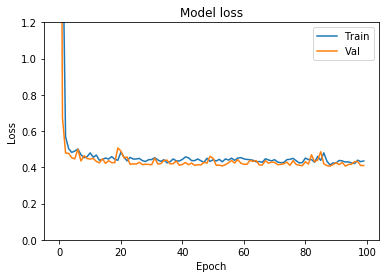

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

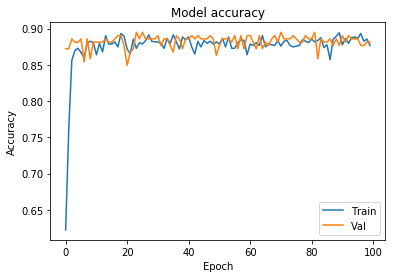

In [30]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()